In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img 

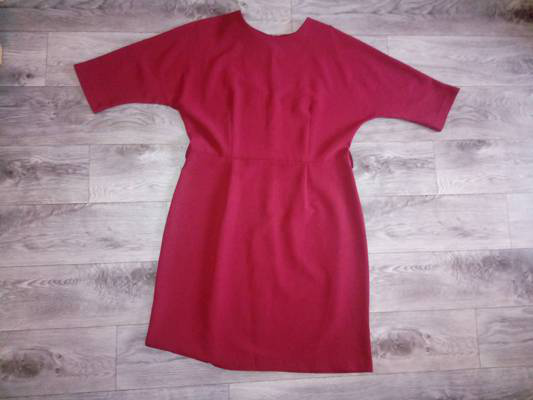

In [4]:
path = r'C:\Users\Zainon\Desktop\clothes classification with VGG19 model\clothing-dataset-small-master\train\dress'
name = '1bb8d90d-2b00-4623-9bfe-2ffac4f7d17f.jpg'
fullname = path + '/' + name
load_img(fullname)

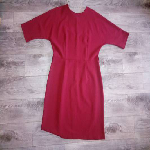

In [5]:
load_img(fullname, target_size=(150, 150))

In [10]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions

In [12]:
model = VGG19(
    weights='imagenet',
    input_shape=(224, 224, 3)
)

574710816/574710816 [==============================] - 3824s 7us/step


In [13]:
img = load_img(fullname, target_size=(224, 224))
x = np.array(img)
x.shape

(224, 224, 3)

In [14]:
X = np.array([x])
X.shape

(1, 224, 224, 3)

In [15]:
X = preprocess_input(X)

In [16]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [17]:
pred.shape

(1, 1000)

In [18]:
pred[0, :10]

array([3.9995214e-08, 4.7571265e-07, 4.7482476e-07, 4.9230465e-07,
       4.0561121e-05, 5.6445670e-06, 8.5346492e-06, 1.0063301e-06,
       2.2341392e-07, 2.4180208e-08], dtype=float32)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
image_size = (224, 224)
batch_size = 32

In [22]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    r"C:\Users\Zainon\Desktop\clothes classification with VGG19 model\clothing-dataset-small-master\train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [23]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    r"C:\Users\Zainon\Desktop\clothes classification with VGG19 model\clothing-dataset-small-master\validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 341 images belonging to 10 classes.


In [24]:
base_model = VGG19(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False
)

80134624/80134624 [==============================] - 807s 10us/step


In [25]:
base_model.trainable = False

In [26]:
inputs = keras.Input(shape=(224, 224, 3))

base = base_model(inputs, training=False)
vector = keras.layers.GlobalAveragePooling2D()(base)
inner=keras.layers.Dense(1024,activation='relu')(vector)
outputs = keras.layers.Dense(10)(inner)

model = keras.Model(inputs, outputs)

In [27]:
model

In [28]:
learning_rate = 0.001

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [29]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "VGG19_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

In [30]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds,callbacks=callbacks)

Epoch 1/10
96/96 [==============================] - 918s 10s/step - loss: 1.3089 - accuracy: 0.6877 - val_loss: 0.7914 - val_accuracy: 0.7449
Epoch 2/10
96/96 [==============================] - 1082s 11s/step - loss: 0.3815 - accuracy: 0.8729 - val_loss: 0.6598 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 916s 10s/step - loss: 0.1864 - accuracy: 0.9390 - val_loss: 0.6223 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 915s 10s/step - loss: 0.1193 - accuracy: 0.9606 - val_loss: 0.7833 - val_accuracy: 0.7947
Epoch 5/10
96/96 [==============================] - 915s 10s/step - loss: 0.0708 - accuracy: 0.9808 - val_loss: 0.7520 - val_accuracy: 0.8006
Epoch 6/10
96/96 [==============================] - 916s 10s/step - loss: 0.0339 - accuracy: 0.9925 - val_loss: 0.5959 - val_accuracy: 0.8299
Epoch 7/10
96/96 [==============================] - 543s 6s/step - loss: 0.0206 - accuracy: 0.9980 - val_loss: 0.6213 - val_accuracy: 0.8358
Epoch 

In [3]:
plt.figure(figsize=(6, 4))

epochs = history.epoch
val = history.history['val_accuracy']
train = history.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('VGG19 v1, lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(np.arange(10))

plt.legend()


plt.savefig('{VGG19}.svg')

plt.show()

NameError: name 'history' is not defined

<Figure size 600x400 with 0 Axes>